In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pypokedex
import glob
import re
from tqdm import tqdm

In [40]:
# Load all the files relevant for the project
image_folder = '../datasets/raw/renders_2d/images'
metadata = pd.read_csv('../datasets/raw/renders_3d/pokemon.csv')
image_paths = sorted(glob.glob(f'{image_folder}/*.png'), )

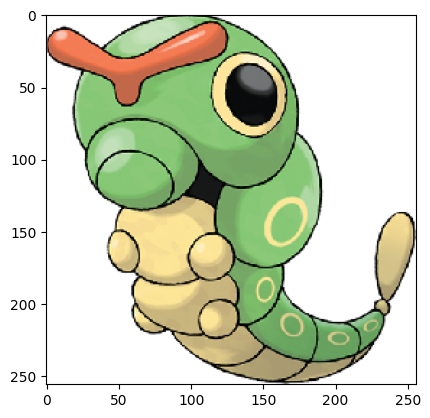

In [41]:
# Display the first image
img = mpimg.imread(image_paths[1])
imgplot = plt.imshow(img)

In [42]:
image_paths_temp = ["../datasets/raw/renders_2d/images/412-plant.png", "../datasets/raw/renders_2d/images/412-sandy"]

In [43]:
# Pair the images with the metadata
names, images, type1, type2, dex = [], [], [], [], []
for image in tqdm(image_paths):
    img = image
    image = image.split('/')[-1].split('.')[0]
    if '-' in image or 'f' in image:
        continue
    pokemon = pypokedex.get(dex=int(image))
    names.append(pokemon.name)
    images.append(img)
    ptype = pokemon.types
    if len(ptype) > 1:
        type1.append(ptype[0])
        type2.append(ptype[1])
    else:
        type1.append(ptype[0])
        type2.append('')
    dex.append(pokemon.dex)

100%|██████████| 819/819 [00:00<00:00, 135513.63it/s]


In [44]:
df = pd.DataFrame({'name': names, 'image': images, 'type1': type1, 'type2': type2, 'dex': dex})
df.sort_values(by='dex', inplace=True);df.reset_index(drop=True, inplace=True)

648    ../datasets/raw/renders_2d/images/666.png
Name: image, dtype: object


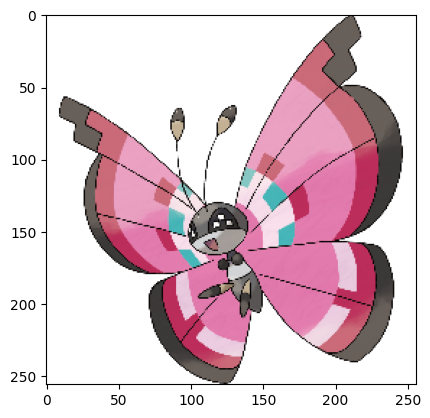

In [45]:
example_path = df[df['dex']==666]['image']
print(example_path)
img = mpimg.imread(example_path.values[0])
imgplot = plt.imshow(img)

In [47]:
df.to_csv('../datasets/processed/pokemon_filtered.csv', index=False)